# Prediction Using Polynomial Regression

### Importing required Packages and Importing Dataset

In [1]:
#import required packages
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
#import required dataset into pandas dataframe
data = pd.read_csv("E:\Datasets\Height_Weight_Dataset.csv")

In [3]:
#printing dataset observations
print("Columns present in dataset : ",list(data))
data.head()

Columns present in dataset :  ['Age', 'Height']


,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139


### Presenting Data

In [4]:
#obtaining information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     71 non-null     int64
 1   Height  71 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [5]:
#obtaining described information on dataset 
data.describe()

,Age,Height
count,71.000000,71.000000
mean,45.000000,160.873239
std,20.639767,20.842902
min,10.000000,138.000000
25%,27.500000,143.500000
50%,45.000000,155.000000
75%,62.500000,171.500000
max,80.000000,208.000000


**Visualize the Data**

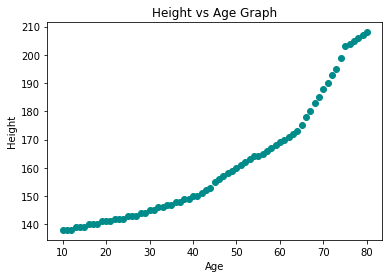

In [6]:
#visualise the data
plt.scatter(data['Age'], data['Height'], color = 'darkcyan')  
plt.title('Height vs Age Graph')
plt.xlabel('Age') 
plt.ylabel('Height') 
plt.show()

### Splitting the Data

In [7]:
#store the data in the form of dependent and independent variables separately
X = data.iloc[:, 0:1].values 
y = data.iloc[:, 1].values 

In [8]:
#split the dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Modelling the Regression Model and Testing it

**Modelling Simple Linear Regression Model**

In [9]:
#create the Linear Regression object
lin_reg = LinearRegression()
#train the model
lin_reg.fit(X_train, y_train)

LinearRegression()

**Modelling Polynomial Regression Model**

In [10]:
#add the polynomial term to the equation/model
polynom = PolynomialFeatures(degree = 2) 
X_polynom = polynom.fit_transform(X_train) 
  
X_polynom

array([[1.000e+00, 6.600e+01, 4.356e+03],
       [1.000e+00, 4.300e+01, 1.849e+03],
       [1.000e+00, 2.700e+01, 7.290e+02],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 6.700e+01, 4.489e+03],
       [1.000e+00, 3.100e+01, 9.610e+02],
       [1.000e+00, 4.200e+01, 1.764e+03],
       [1.000e+00, 5.200e+01, 2.704e+03],
       [1.000e+00, 7.500e+01, 5.625e+03],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 6.900e+01, 4.761e+03],
       [1.000e+00, 7.400e+01, 5.476e+03],
       [1.000e+00, 4.700e+01, 2.209e+03],
       [1.000e+00, 7.100e+01, 5.041e+03],
       [1.000e+00, 5.700e+01, 3.249e+03],
       [1.000e+00, 1.700e+01, 2.890e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 6.800e+01, 4.624e+03],
       [1.000e+00, 5.600e+01, 3.136e+03],
       [1.000e+00, 6.500e+01, 4.225e+03],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 2.300e+01, 5.290e+02],
       [1.000e+00, 1.100e+01, 1.210e+02],
       [1.000e+00, 4.100e+01, 1.68

In [11]:
#create the Linear Regression object
poly_reg = LinearRegression()
#train the model with data transformed with polynomial features
poly_reg.fit(X_polynom, y_train) 

LinearRegression()

**Results for Linear Regression Model and Polynomial Regression Model**

In [12]:
#defining the function to print results
def print_results(y_t , y_p):
    print('         R-Square Error :', metrics.r2_score(y_t, y_p))
    print('    Mean Absolute Error :', metrics.mean_absolute_error(y_t, y_p))
    print('     Mean Squared Error :', metrics.mean_squared_error(y_t, y_p))
    print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_t, y_p)))

In [13]:
#predicted of dependent variable from train dataset w.r.t Linear Regression Model
y_predict_slr = lin_reg.predict(X_test)

#predicted of dependent variable from train dataset w.r.t Polynomial Regression Model
y_predict_pr = poly_reg.predict(polynom.fit_transform(X_test))

In [14]:
#display the results for both regression model
print("Results Associated with Simple Linear Regression\n")
print_results(y_test, y_predict_slr)
print("--------------------------------------------------")
print("Results Associated with Polynomial Regression\n")
print_results(y_test, y_predict_pr)

Results Associated with Simple Linear Regression

         R-Square Error : 0.8820963732669568
    Mean Absolute Error : 5.959677794309096
     Mean Squared Error : 45.13467760557491
Root Mean Squared Error : 6.718234709026985
--------------------------------------------------
Results Associated with Polynomial Regression

         R-Square Error : 0.9886782808421929
    Mean Absolute Error : 1.6633019936783753
     Mean Squared Error : 4.334066375120853
Root Mean Squared Error : 2.081842062962715


### Visualize the Models

**Visualize Model with Linear Regression Fit**

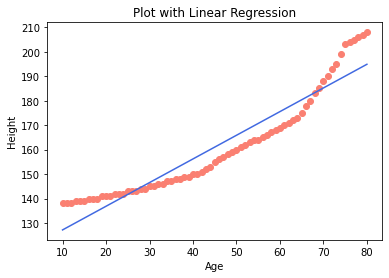

In [15]:
#visualise the linear regression line
plt.scatter(X, y, color = 'salmon')
plt.plot(X, lin_reg.predict(X), color = 'royalblue') 
plt.title('Plot with Linear Regression') 
plt.xlabel('Age') 
plt.ylabel('Height')
plt.show() 

**Visualize Model with Polynomial Regression Fit**

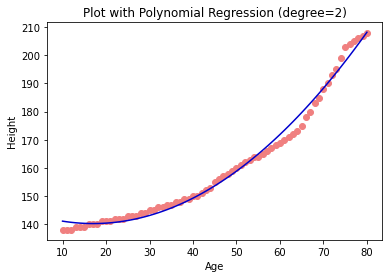

In [16]:
#visualise the polynomial regression curve
plt.scatter(X, y, color = 'lightcoral') 
plt.plot(X, poly_reg.predict(polynom.fit_transform(X)), color = 'mediumblue') 
plt.title('Plot with Polynomial Regression (degree=2)') 
plt.xlabel('Age') 
plt.ylabel('Height')
plt.show() 